In [3]:
#install pytrends
!pip install pytrends

  Using cached pytrends-4.7.3-py3-none-any.whl (14 kB)


In [4]:
from pytrends.request import TrendReq

#make a pytrends object to request Google Trends data
pytrends = TrendReq(hl='en-US')     
                
#extract data about weekly searches of certain keywords
keywords = ["Python", "R", "C++", "Java", "HTML"]
pytrends.build_payload(keywords, timeframe='today 5-y')

In [5]:
#store kewords data
data = pytrends.interest_over_time()
data = data.drop('isPartial', axis=1)

data.tail()

,Python,R,C++,Java,HTML
date,,,,,
2021-05-02,22,48,84,19,10
2021-05-09,23,48,83,19,10
2021-05-16,23,49,85,20,11
2021-05-23,22,46,81,19,10
2021-05-30,16,46,80,15,7


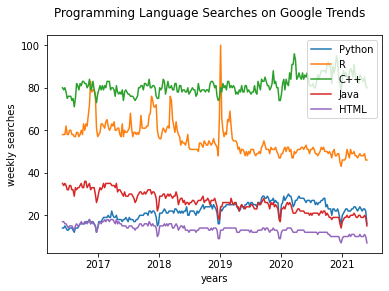

<Figure size 432x288 with 0 Axes>

In [7]:
import matplotlib.pyplot as plt

#plot data
plt.plot(data)

#add titles
plt.suptitle('Programming Language Searches on Google Trends')
plt.xlabel('years')                       
plt.ylabel('weekly searches')  

#add legend
plt.legend(keywords, loc='upper right')

plt.show()
plt.savefig('best_language.png')

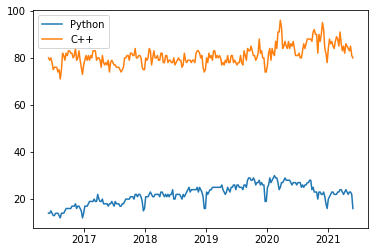

In [8]:
#compare language popularity
focus = ['Python', 'C++'] 

plt.plot(data[focus])
plt.legend(focus)

In [9]:
#which are the top countries searching for python?
import pandas as pd

#extract country-level kewords search data
country_data = pytrends.interest_by_region(resolution='COUNTRY', inc_low_vol=True)

#get countries with the highest searches of "Python"
data2 = country_data['Python'].nlargest(10)

#convert to dataframe
data2 = data2.to_frame()

data2

,Python
geoName,
China,49
Israel,34
St. Helena,27
Eritrea,24
Singapore,23
South Korea,23
Hong Kong,20
Iceland,20
Russia,20


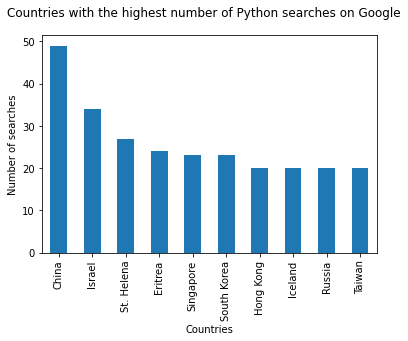

In [10]:
#plot a bar chart
data2.plot(kind='bar', legend=None)

#titles
plt.suptitle('Countries with the highest number of Python searches on Google')
plt.ylabel('Number of searches')
plt.xlabel('Countries')

plt.show()


In [15]:
data3 = country_data[54:60]
data3

,Python,R,C++,Java,HTML
geoName,,,,,
Croatia,12,23,46,12,7
Cuba,17,14,37,20,12
Curaçao,7,32,46,7,8
Cyprus,13,22,44,11,10
Czechia,14,23,40,14,9
Côte d’Ivoire,5,15,50,24,6


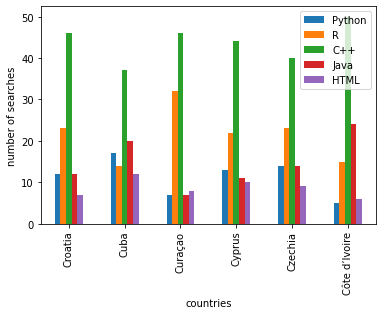

In [16]:
#plot bar chart
data3.plot(kind='bar')

plt.ylabel('number of searches')
plt.xlabel('countries')

plt.show()

In [19]:
data4 = country_data[1:50]
data4

,Python,R,C++,Java,HTML
geoName,,,,,
Albania,4,14,44,29,9
Algeria,6,26,51,12,5
American Samoa,0,42,58,0,0
Andorra,8,30,43,11,8
Angola,4,20,47,21,8
Anguilla,0,39,61,0,0
Antarctica,0,0,0,0,0
Antigua & Barbuda,4,33,50,8,5
Argentina,6,22,58,9,5


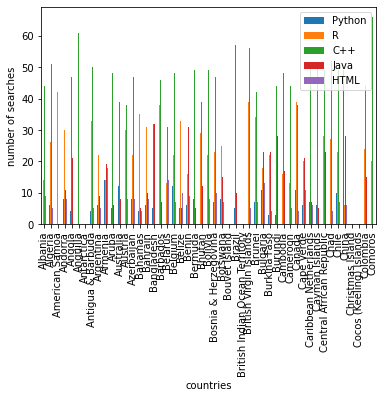

In [22]:
#plot bar chart
data4.plot(kind='bar')

plt.ylabel('number of searches')
plt.xlabel('countries')

plt.show()